### 1.1 Plot Function

In [4]:
import numpy as np
import pylab as pyl
import plotly.graph_objects as go

def function(x, y):
 return 25 * (y + x ** 2) ** 2 + (1 + x) ** 2

x = np.arange(-1, 1, 0.1) # x range 
y = np.arange(-1, 1, 0.1) # y range

X, Y = pyl.meshgrid(x, y)
Z = function(X, Y) 

fig = go.Figure(go.Surface(
    contours={
        "x": {"show": True, "start": 1, "end": 2, "size": 0.05, "color": "white"},
        "y": {"show": True, "start": 1, "end": 2, "size": 0.05, "color": "white"},
        "z": {"show": True, "start": 0, "end": 0.5, "size": 0.1,  "color": "white"}
    }, x=X, y=Y, z=Z))

fig.update_layout(
    width=500,
    height=500,
    title="f(x,y) = 25(y + x<sup>2</sup>)<sup>2</sup> + (1 + x)<sup>2</sup>",
)


### 1.2 Genetic Algorithm

C:\Users\steni\anaconda3\lib\site-packages\pygad\pygad.py:486: UserWarning:

The percentage of genes to mutate (mutation_percent_genes=0.01) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.




Generation = 1
Fitness    = 2.759043168601633
Change     = 2.759043168601633

Generation = 2
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 3
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 4
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 5
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 6
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 7
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 8
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 9
Fitness    = 2.759043168601633
Change     = 0.0

Generation = 10
Fitness    = 2.759043168601633
Change     = 0.0


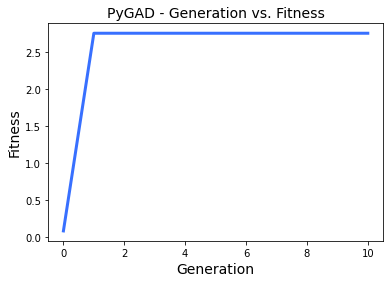


Best fitness reached after 1 generations.
Fitness of best solution            = 2.759043168601633
Parameters of best solution         = [-1.59378916 -2.5600213 ]
Index of best solution              = 0


In [5]:

import pygad as pg
import numpy as np

def function(x, y):
    """Function for the equation"""
    return 25 * (y + x ** 2) ** 2 + (1 + x)**2


desired_output = 0


def fitness_func(solution, solution_idx):
    """Function calculation fitness score"""
    output = function(solution[0], solution[1])
    fitness = 1.0 / (np.abs(output - desired_output) + 0.000001)

    return fitness

last_fitness = 0

def on_generation(ga_instance):
    """Function to be called on each generation.
    For easier debugging, status updates 
    and updating of the last best solution."""
    global last_fitness
    print(f"\nGeneration = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pg.GA(
    sol_per_pop=4,  # 4, 10
    num_generations=10,  # 10, 100, 1000
    num_parents_mating=2,
    crossover_probability=0.25,
    crossover_type='single_point',
    num_genes=2,
    fitness_func=fitness_func,
    mutation_type='random',
    mutation_percent_genes=0.01,
    on_generation=on_generation)

ga_instance.run()
ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)

# Details of the best solution.
print(f"\nBest fitness reached after {ga_instance.best_solution_generation} generations.")
print(f"Fitness of best solution            = {solution_fitness}")
print(f"Parameters of best solution         = {solution}")
print(f"Index of best solution              = {solution_idx}")
